In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Preprocessing ### 
**1. Import all the files: Station, demand_bike and demand_dock**

In [4]:
station=pd.read_csv('station.csv')
demand_bike=pd.read_csv('demand_bike.csv')
demand_dock=pd.read_csv('demand_dock.csv')
station=station.drop('Unnamed: 0',axis=1)
demand_bike=demand_bike.drop('Unnamed: 0',axis=1)
demand_dock=demand_dock.drop('Unnamed: 0',axis=1)

**2. For station, we drop all the records that showing the station is not in service**

In [5]:
station_inservice=station.loc[(station.in_service==1)]

**3. For bike demand data, we need to count how many bikes rented in each station.**

In [6]:
demand_bike=demand_bike.pivot_table(values='minute',index=['Start Station ID','date','hour'],aggfunc='count',fill_value=0)

**4. Do the same thing for dock demand data**

In [7]:
demand_dock=demand_dock.pivot_table(values='minute',index=['End Station ID','date','hour'],aggfunc='count',fill_value=0)

**5. For Station bike availability, calculate the average amount of bikes in each station during 24 hours**

In [8]:
daily_bike_avail=station_inservice.pivot_table(values='avail_bikes',index='dock_id',columns='hour',aggfunc='mean')

In [9]:
station_inservice.head()

,dock_id,date,hour,minute,avail_bikes,avail_docks,tot_docks,in_service,status_key
0,72,16-07-01,1,0,19,19,39,1,1
1,72,16-07-01,1,29,19,19,39,1,1
2,72,16-07-01,1,59,19,19,39,1,1
3,72,16-07-01,2,29,19,19,39,1,1
4,72,16-07-01,2,58,20,18,39,1,1


**6. For statin dock availibility, calculate the average amount of available docks in each station during 24 hours.But since the total number of docks in each station is certain, the percentage of dock availability would be more informative**

In [10]:
daily_dock_avail=station_inservice.pivot_table(values='avail_docks',index='dock_id',columns='hour',aggfunc='mean')

In [11]:
station_inservice['dock_percent']=station_inservice['avail_docks']/station_inservice['tot_docks']
daily_dock_avail_percent=station_inservice.pivot_table(values='dock_percent',index='dock_id',columns='hour',aggfunc='mean')

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


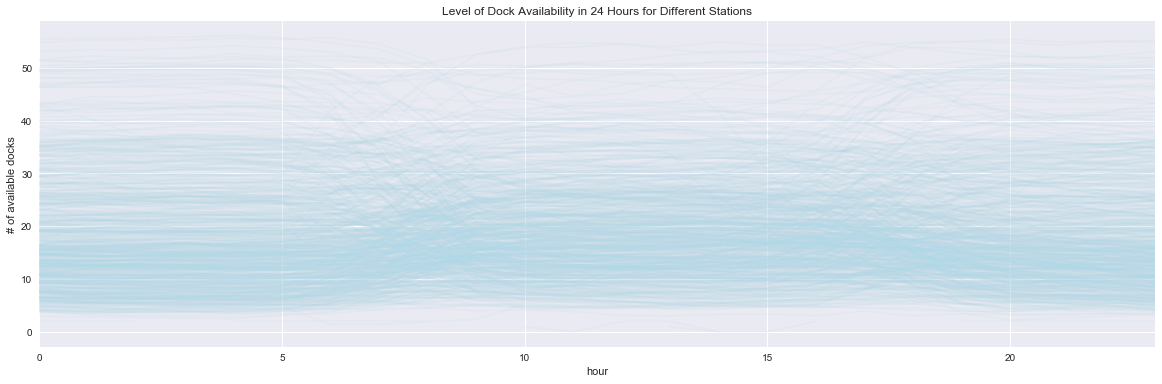

In [35]:
plt.rcParams['figure.figsize']=20,6
daily_dock_avail.transpose().plot(color='lightblue',alpha=0.1,legend=False,title='Level of Dock Availability in 24 Hours for Different Stations')
plt.ylabel('# of available docks')

### Visualization###

**1. Use heatmap to find the average number of bikes that provided in each station during 24 hours.** 

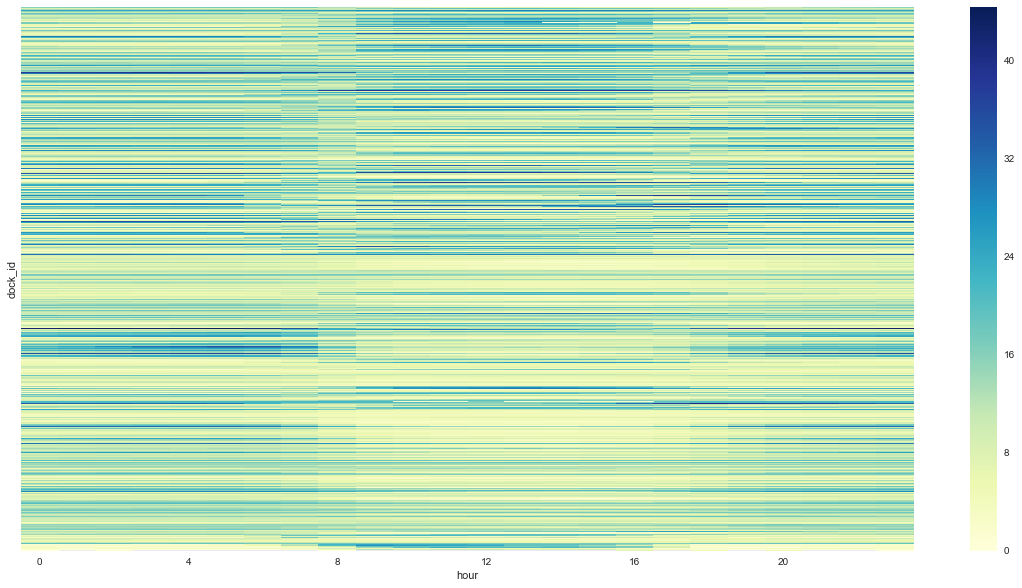

In [29]:
plt.rcParams['figure.figsize']=20,10
sns.heatmap(daily_bike_avail,cmap="YlGnBu",xticklabels=4, yticklabels=False)

**correlation heatmap**

In [ ]:
plt.rcParams['figure.figsize']=15,15
sns.heatmap(corr_temp.loc[corr_temp.index[0:50],corr_temp.index[0:50]])

**2. Use plot lines to visualize the availability**

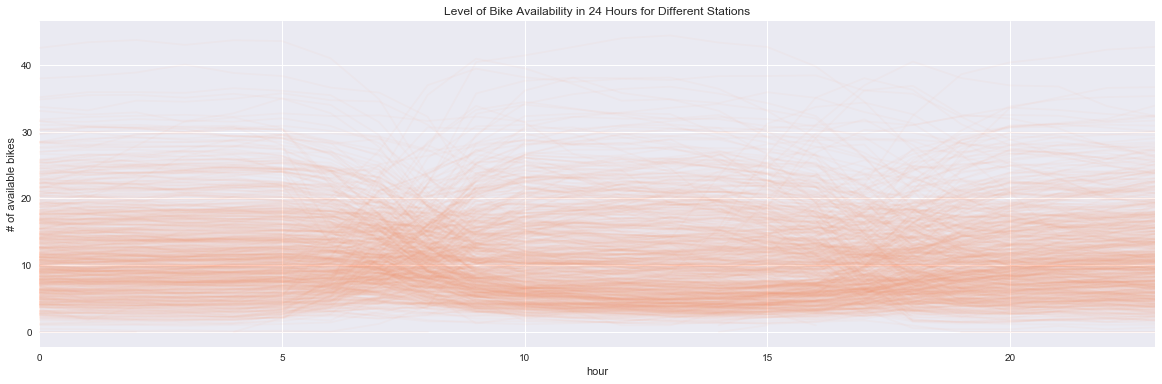

In [36]:
plt.rcParams['figure.figsize']=20,6
daily_bike_avail.transpose().plot(color='lightsalmon',alpha=0.05,legend=False,title='Level of Bike Availability in 24 Hours for Different Stations')
plt.ylabel('# of available bikes')

**3. Bike demand Visualization**

In [20]:
#calculate average demand in 24 hours
daily_demand_bike=demand_bike.pivot_table(values='minute',index=['Start Station ID'],columns='hour',fill_value=0)

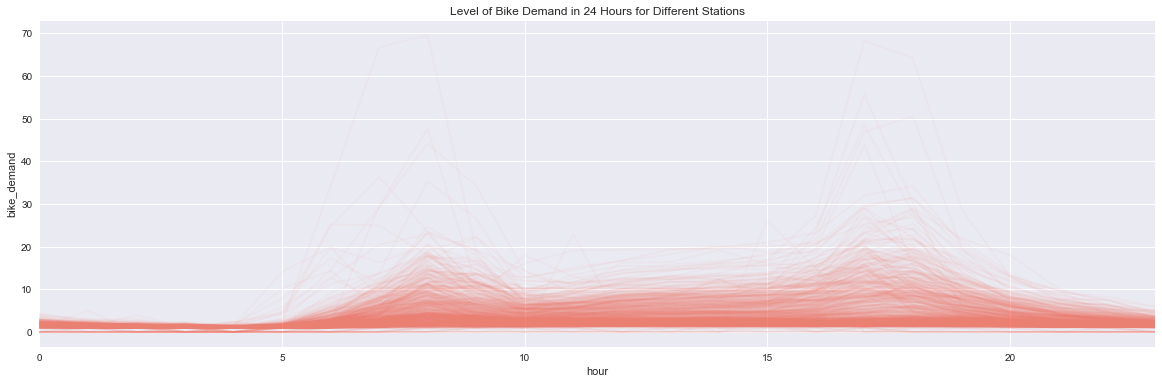

In [27]:
plt.rcParams['figure.figsize']=20,6
daily_demand_bike.transpose().plot(color='salmon',alpha=0.05,legend=False,title='Level of Bike Demand in 24 Hours for Different Stations')
plt.ylabel('bike_demand')

**4. Dock demand Visualization**

In [24]:
#calculate average demand in 24 hours
daily_demand_dock=demand_dock.pivot_table(values='minute',index=['End Station ID'],columns='hour',fill_value=0)

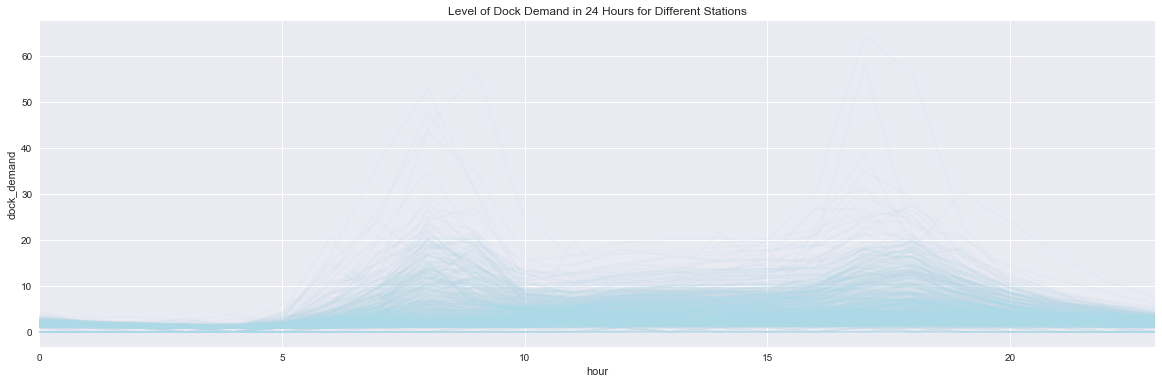

In [28]:
daily_demand_dock.transpose().plot(color='lightblue',alpha=0.08,legend=False,title='Level of Dock Demand in 24 Hours for Different Stations')
plt.ylabel('dock_demand')

### Correlation  (The followings are based on the availability data) ###

**1. For each station, find all stations that have high correlation with it. (correlation coefficient >=0.9)**

In [18]:
# Based on Availability of Bikes
daily_bike_avail_corr=station_inservice.pivot_table(values='avail_bikes',index='hour',columns='dock_id',aggfunc='mean')
daily_bike_avail_corr=daily_bike_avail_corr.dropna(axis=1, how='any')
corr_temp=daily_bike_avail_corr.corr()
rows=corr_temp.shape[0]
avail_bike_corr_max={}
for i in range(rows):
    idx=corr_temp.index[i]
    values=corr_temp.loc[idx,:]
    avail_bike_corr_max[idx]=corr_temp.columns[abs(values)>=0.9]     
avail_bike_corr_max

{72: Int64Index([  72,   79,   82,   83,  120,  144,  150,  152,  174,  216,
             ...
             3411, 3412, 3413, 3421, 3422, 3423, 3430, 3445, 3449, 3454],
            dtype='int64', name='dock_id', length=226),
 79: Int64Index([  72,   79,   82,   83,  119,  120,  144,  147,  150,  151,
             ...
             3430, 3434, 3438, 3440, 3445, 3449, 3452, 3454, 3461, 3462],
            dtype='int64', name='dock_id', length=416),
 82: Int64Index([  72,   79,   82,   83,  120,  127,  144,  147,  150,  152,
             ...
             3423, 3424, 3427, 3430, 3434, 3440, 3445, 3449, 3454, 3461],
            dtype='int64', name='dock_id', length=361),
 83: Int64Index([  72,   79,   82,   83,  120,  144,  150,  152,  174,  216,
             ...
             3411, 3412, 3413, 3421, 3422, 3423, 3430, 3445, 3449, 3454],
            dtype='int64', name='dock_id', length=235),
 116: Int64Index([ 116,  153,  164,  167,  195,  259,  264,  306,  328,  337,  351,
              360,  

In [19]:
# Based on Availability of Docks
daily_dock_avail_corr=station_inservice.pivot_table(values='avail_docks',index='hour',columns='dock_id',aggfunc='mean')
daily_dock_avail_corr=daily_dock_avail_corr.dropna(axis=1, how='any')
corr_temp=daily_dock_avail_corr.corr()
rows=corr_temp.shape[0]
avail_dock_corr_max={}
for i in range(rows):
    idx=corr_temp.index[i]
    values=corr_temp.loc[idx,:]
    avail_dock_corr_max[idx]=corr_temp.columns[abs(values)>=0.9]     
avail_dock_corr_max

{72: Int64Index([  72,   79,   82,   83,  120,  144,  147,  150,  152,  174,
             ...
             3413, 3421, 3422, 3423, 3427, 3430, 3434, 3445, 3449, 3454],
            dtype='int64', name='dock_id', length=253),
 79: Int64Index([  72,   79,   82,   83,  119,  120,  144,  147,  150,  151,
             ...
             3427, 3430, 3434, 3438, 3440, 3445, 3449, 3452, 3454, 3461],
            dtype='int64', name='dock_id', length=409),
 82: Int64Index([  72,   79,   82,   83,  120,  127,  144,  147,  150,  151,
             ...
             3423, 3424, 3427, 3430, 3434, 3440, 3445, 3449, 3454, 3461],
            dtype='int64', name='dock_id', length=364),
 83: Int64Index([  72,   79,   82,   83,  120,  144,  147,  150,  152,  174,
             ...
             3412, 3413, 3421, 3422, 3423, 3427, 3430, 3445, 3449, 3454],
            dtype='int64', name='dock_id', length=234),
 116: Int64Index([ 116,  153,  164,  167,  195,  259,  264,  306,  328,  337,  360,
              362,  

**2. For a certain station, plot the availability of bikes for all the stations that are identified having high correlation with it. Example below: stations 72 and 79, where the darker line indicate the given station, the lighter lines are correlated stations, and the shadow indicate the 75 and 25 percentile of the given station**

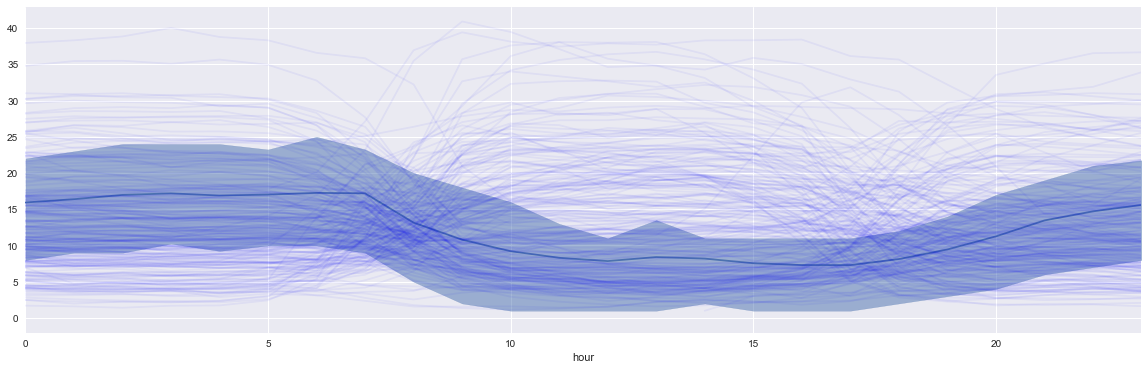

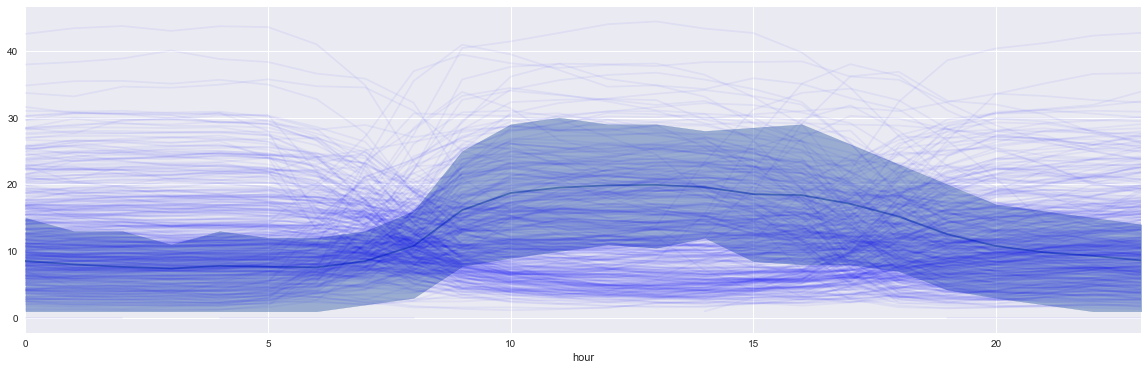

In [96]:
for i in range(2):
    idx=corr_temp.index[i]
    pos=avail_bike_corr_max[idx]!=idx
    df_highcorr=daily_bike_avail.loc[pos,:]
    df_pos=station_inservice.dock_id==idx
    df=station_inservice.loc[df_pos,:]
    high=df.groupby(by='hour')['avail_bikes'].apply(np.percentile, 75)
    low=df.groupby(by='hour')['avail_bikes'].apply(np.percentile, 25)
    avg=df.groupby(by='hour')['avail_bikes'].mean()
    plt.figure()
    ax=df.groupby(by='hour')['avail_bikes'].mean().plot(legend=False)
    x = np.arange(len(df.hour.unique()))
    palette = sns.color_palette()
    ax.fill_between(x, low, high, alpha=.5, color=palette.pop(0))
    df_highcorr.transpose().plot( color='b',alpha=0.05,ax=ax,legend=False)
    plt.show()

#### It is observed that not all high correlated stations have the same daily pattern. Therefore, instead of finding high correlated station, we do clustering using Dynamic Time Warping (DTW) to find stations has the same daily availability pattern####

### Clustering ###

In [9]:
#DTW function
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return math.sqrt(DTW[len(s1)-1, len(s2)-1])
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return math.sqrt(LB_sum)
import random
def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(data,num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        #print counter
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
                assignments[closest_clust].append(ind)
    
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return (centroids,assignments)


In [10]:
#centroids: mean of the cluster
#assignments: station id that assign to the cluster
#I choose 30 clusters in this case
daily_bike_avail=daily_bike_avail.dropna(axis=0, how='any')
centroids,assignments=k_means_clust(list(daily_bike_avail.values),25,60,4)


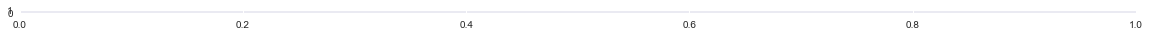

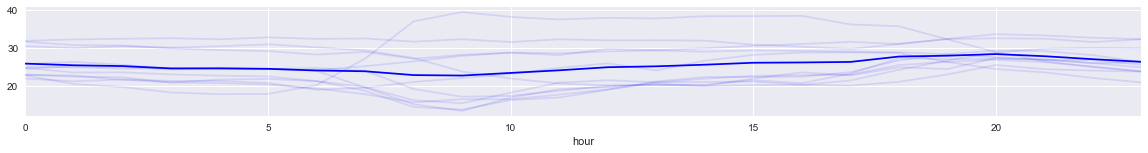

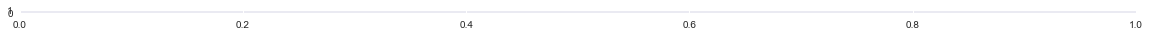

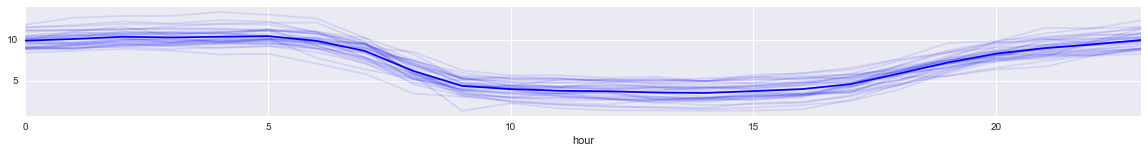

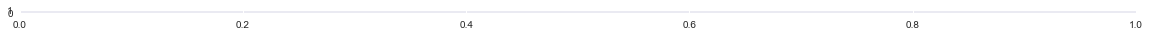

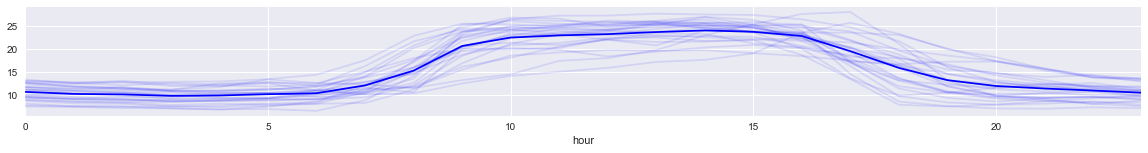

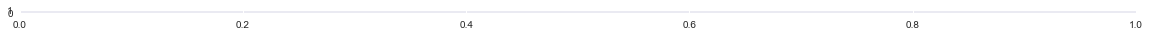

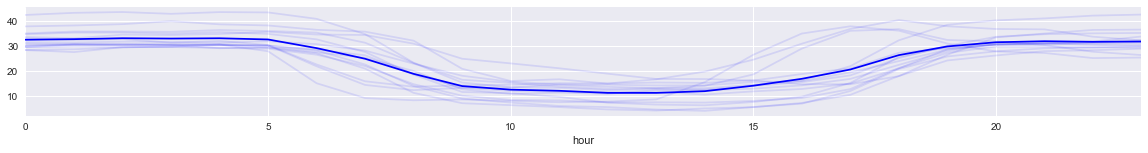

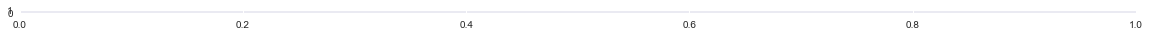

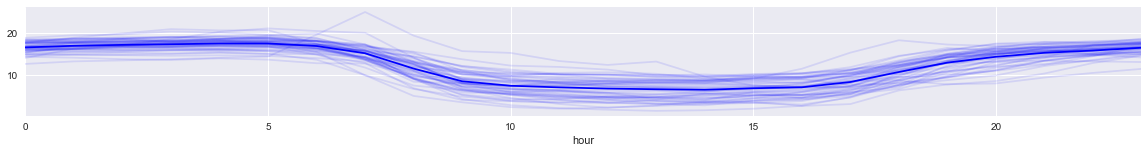

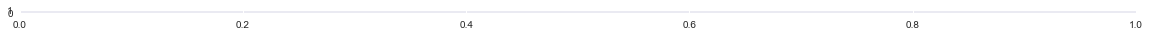

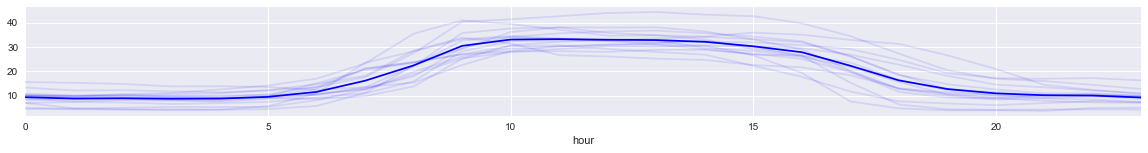

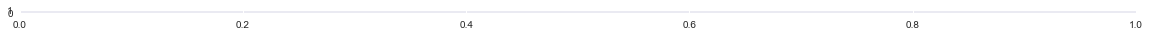

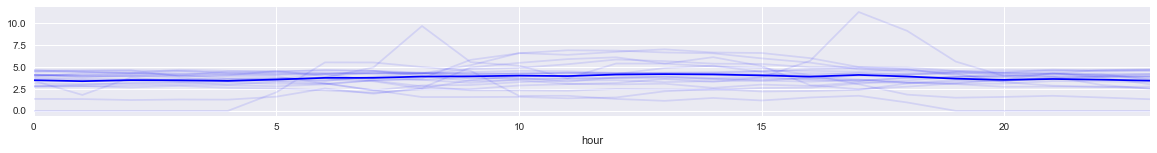

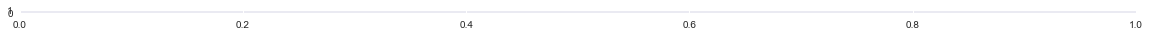

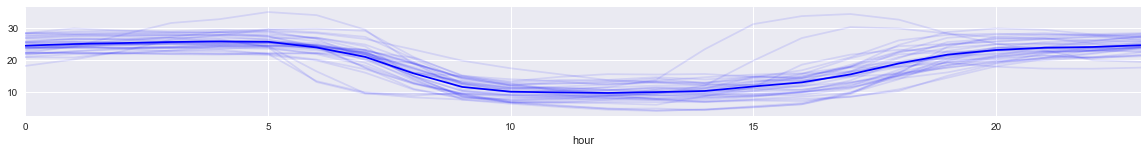

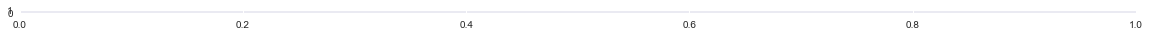

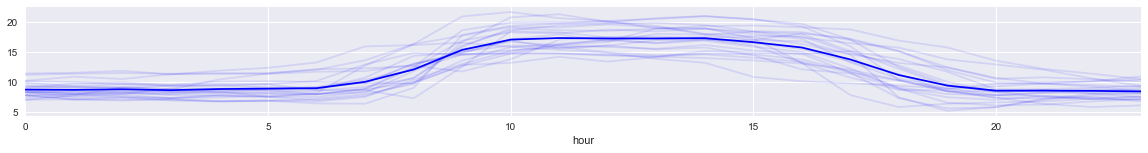

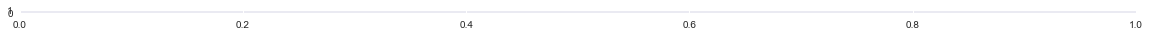

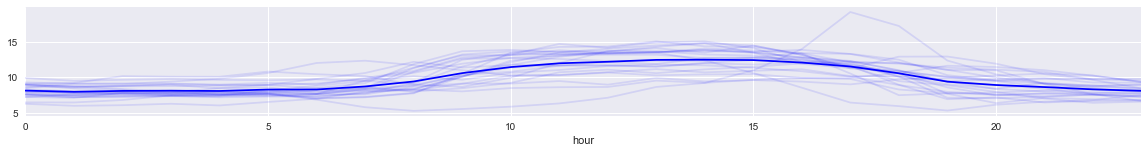

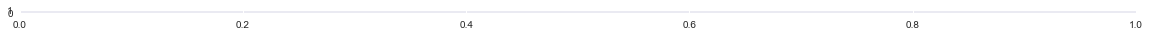

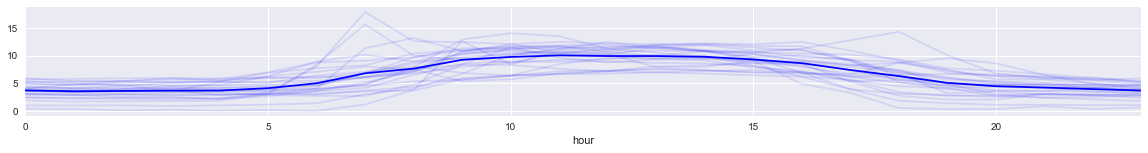

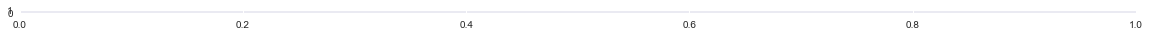

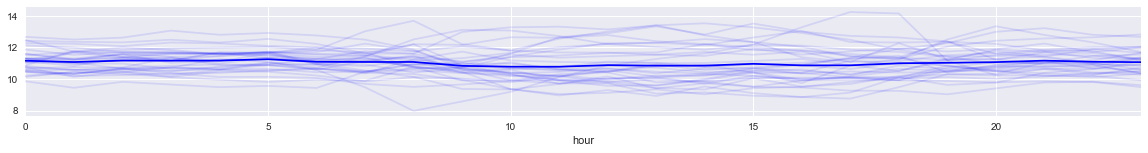

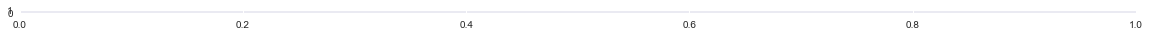

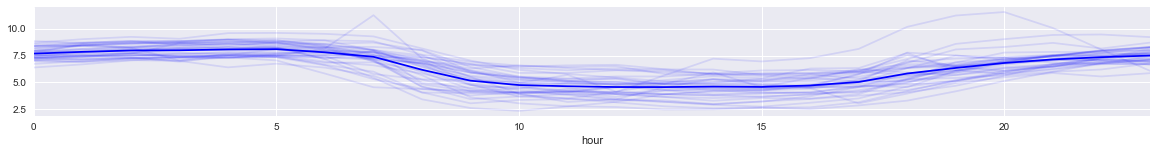

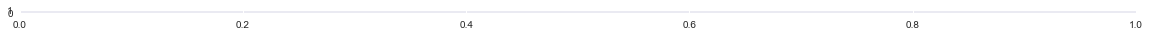

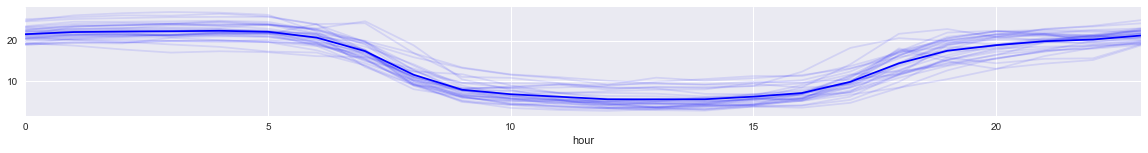

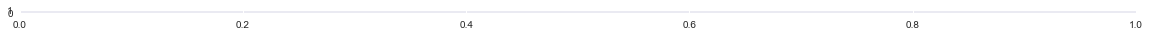

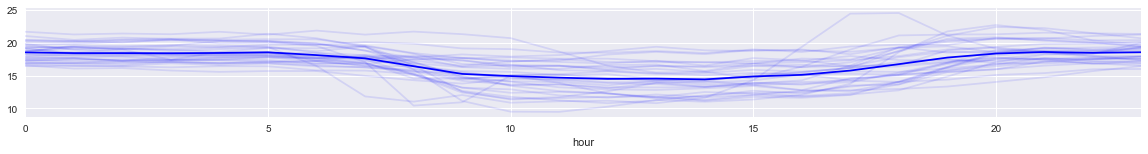

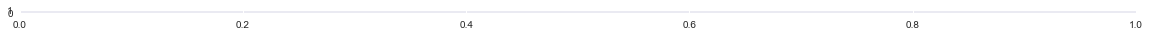

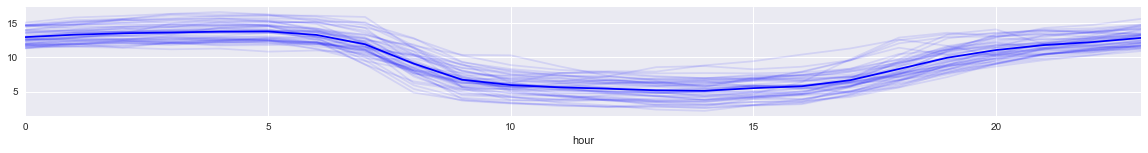

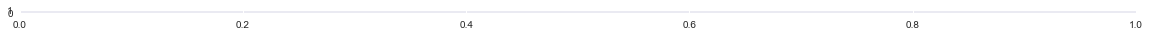

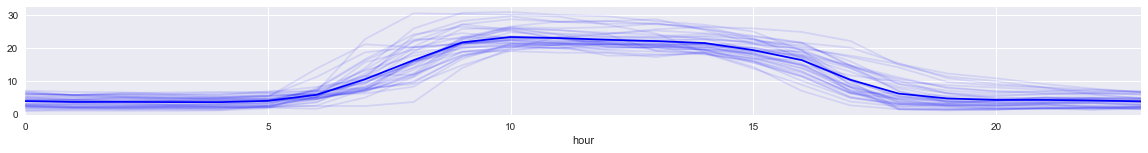

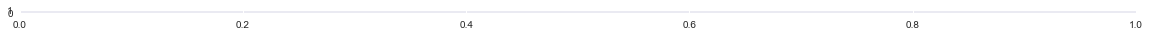

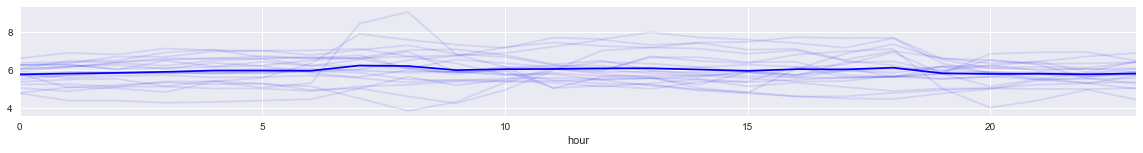

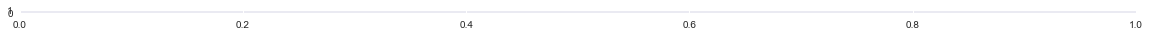

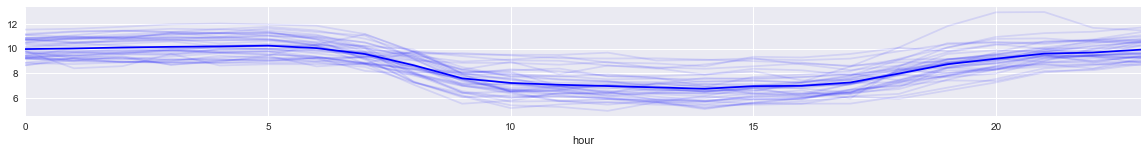

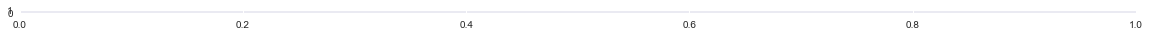

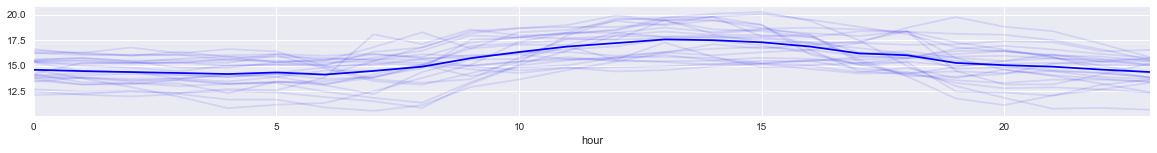

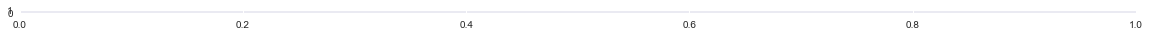

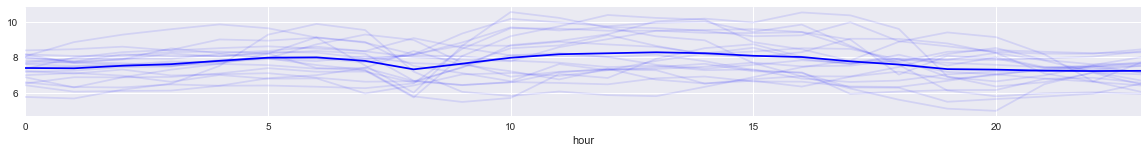

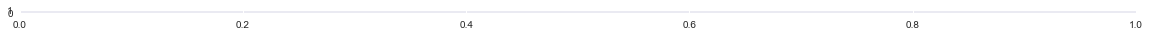

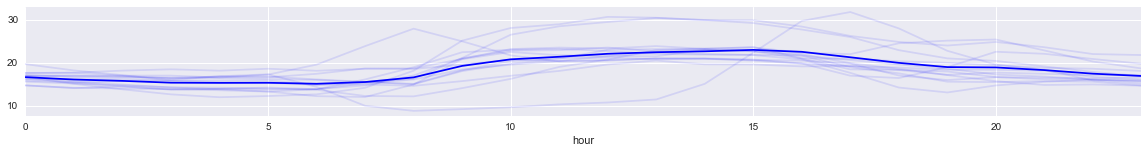

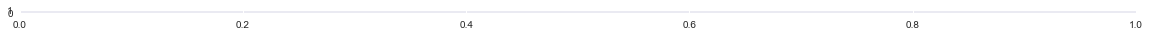

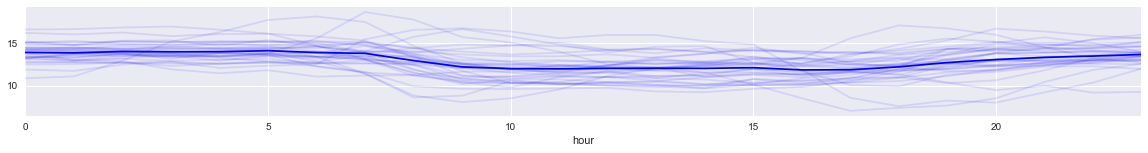

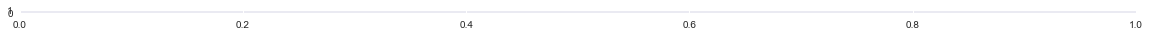

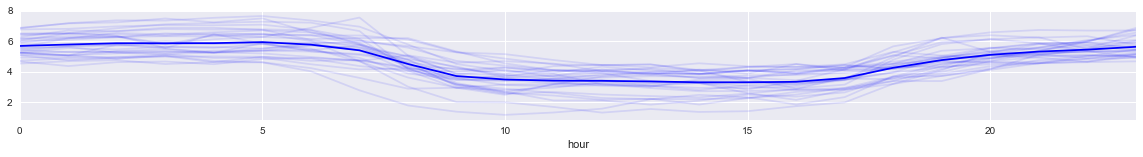

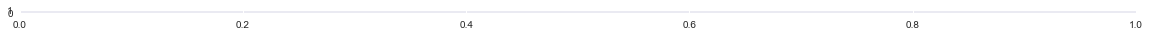

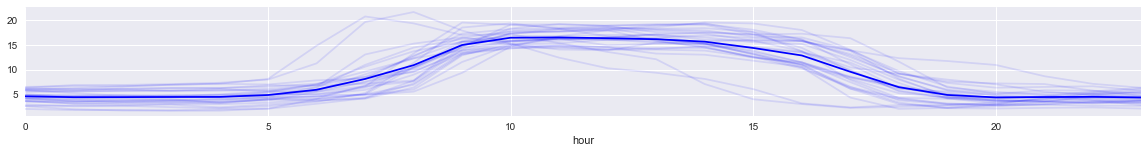

In [11]:
plt.rcParams['figure.figsize']=20,2
for i in range(25):
    plt.figure(1)
    plt.subplot(30,1,i+1)
    #daily_bike_avail.loc[daily_bike_avail.index[assignments[i]],:].transpose().plot( color='b',alpha=0.1).legend(bbox_to_anchor=(1, 1))
    ax=daily_bike_avail.loc[daily_bike_avail.index[assignments[i]],:].transpose().plot( color='b',alpha=0.1,legend=False)
    ax.plot(centroids[i],'b-')
    plt.show()

### Data Processing ###

In [12]:
station_id=72
station_givenStation=station_inservice.loc[station_inservice.dock_id==station_id]

In [13]:
station_givenStation=station_givenStation.pivot_table(values='avail_bikes',index='date',columns='hour',aggfunc='mean')

In [14]:
given_daily_bike_avail=daily_bike_avail.loc[daily_bike_avail.index==station_id]
for i in range(24):
    col=station_givenStation.columns[i]
    station_givenStation[col]=station_givenStation.loc[:,col].fillna(value=given_daily_bike_avail.loc[:,col].values[0])
    

In [107]:
#create basic data
data=pd.DataFrame(columns=['date','hour','X(t-1)','X(t-2)','X(t)'])
k=0
for i in range(1,337):
    for j in range(0,24):
        idx=station_givenStation.index[i]
        data.loc[k,'date']=station_givenStation.index[i]
        data.loc[k,'hour']=station_givenStation.columns[j]
        data.loc[k,'X(t)']=station_givenStation.loc[idx,j]
        if j==0:
            data.loc[k,'X(t-1)']=station_givenStation.loc[station_givenStation.index[i-1],23]
            data.loc[k,'X(t-2)']=station_givenStation.loc[station_givenStation.index[i-1],22]
        elif j==1:
            data.loc[k,'X(t-1)']=station_givenStation.loc[idx,j-1]
            data.loc[k,'X(t-2)']=station_givenStation.loc[station_givenStation.index[i-1],23]
        elif j>1:
            data.loc[k,'X(t-1)']=station_givenStation.loc[idx,j-1]
            data.loc[k,'X(t-2)']=station_givenStation.loc[idx,j-2]
        k=k+1


In [61]:
##create basic +corr data
corr_col=avail_dock_corr_max[station_id][avail_dock_corr_max[station_id]!=station_id].values[0:10]
col=['date','hour','X(t-1)','X(t-2)','X(t)']
col.extend(corr_col)
data_corr=pd.DataFrame(columns=col)
k=0
for i in range(1,337):
    for j in range(0,24):
        idx=station_givenStation.index[i]
        data_corr.loc[k,'date']=station_givenStation.index[i]
        data_corr.loc[k,'hour']=station_givenStation.columns[j]
        data_corr.loc[k,'X(t)']=station_givenStation.loc[idx,j]
        if j==0:
            data_corr.loc[k,'X(t-1)']=station_givenStation.loc[station_givenStation.index[i-1],23]
            data_corr.loc[k,'X(t-2)']=station_givenStation.loc[station_givenStation.index[i-1],22]
        elif j==1:
            data_corr.loc[k,'X(t-1)']=station_givenStation.loc[idx,j-1]
            data_corr.loc[k,'X(t-2)']=station_givenStation.loc[station_givenStation.index[i-1],23]
        elif j>1:
            data_corr.loc[k,'X(t-1)']=station_givenStation.loc[idx,j-1]
            data_corr.loc[k,'X(t-2)']=station_givenStation.loc[idx,j-2]
        for c in corr_col:
            station_id_corr=c
            station_corr=station_inservice.loc[station_inservice.dock_id==station_id_corr]
            station_corr=station_corr.pivot_table(values='avail_bikes',index='date',columns='hour',aggfunc='mean')
            corr_daily_bike_avail=daily_bike_avail.loc[daily_bike_avail.index==station_id_corr]
            for h in range(24):
                col=station_givenStation.columns[h]
                station_corr[col]=station_corr.loc[:,col].fillna(value=corr_daily_bike_avail.loc[:,col].values[0])
            if j==0:
                if station_givenStation.index[i-1] not in station_corr.index:
                    data_corr.loc[k,c]=corr_daily_bike_avail[23].values[0]
                else:
                    data_corr.loc[k,c]=station_corr.loc[station_givenStation.index[i-1],23] 
            elif j>=1:
                if idx not in station_corr.index:
                    data_corr.loc[k,c]=corr_daily_bike_avail[j-1].values[0]
                else:
                    data_corr.loc[k,c]=station_corr.loc[idx,j-1]      
        k=k+1

In [15]:
#create basic+cluster data
assignments_new={}
for i in range(len(assignments)):
    assignments_new[i]=list(daily_bike_avail.index[assignments[i]])
for i in range(len(assignments_new)):
    for j in range(len(assignments_new[i])):
        if assignments_new[i][j]==station_id:
            pos=[i,j]
col_list=assignments_new[pos[0]]
del col_list[pos[1]]
col=['date','hour','X(t-1)','X(t-2)','X(t)']
col.extend(col_list)
data_cluster=pd.DataFrame(columns=col)
k=0
for i in range(1,337):
    for j in range(0,24):
        idx=station_givenStation.index[i]
        data_cluster.loc[k,'date']=station_givenStation.index[i]
        data_cluster.loc[k,'hour']=station_givenStation.columns[j]
        data_cluster.loc[k,'X(t)']=station_givenStation.loc[idx,j]
        if j==0:
            data_cluster.loc[k,'X(t-1)']=station_givenStation.loc[station_givenStation.index[i-1],23]
            data_cluster.loc[k,'X(t-2)']=station_givenStation.loc[station_givenStation.index[i-1],22]
        elif j==1:
            data_cluster.loc[k,'X(t-1)']=station_givenStation.loc[idx,j-1]
            data_cluster.loc[k,'X(t-2)']=station_givenStation.loc[station_givenStation.index[i-1],23]
        elif j>1:
            data_cluster.loc[k,'X(t-1)']=station_givenStation.loc[idx,j-1]
            data_cluster.loc[k,'X(t-2)']=station_givenStation.loc[idx,j-2]
        for c in col_list:
            station_id_cluster=c
            station_cluster=station_inservice.loc[station_inservice.dock_id==station_id_cluster]
            station_cluster=station_cluster.pivot_table(values='avail_bikes',index='date',columns='hour',aggfunc='mean')
            cluster_daily_bike_avail=daily_bike_avail.loc[daily_bike_avail.index==station_id_cluster]
            for h in range(24):
                col=station_givenStation.columns[h]
                station_cluster[col]=station_cluster.loc[:,col].fillna(value=cluster_daily_bike_avail.loc[:,col].values[0])
            if j==0:
                if station_givenStation.index[i-1] not in station_cluster.index:
                    data_cluster.loc[k,c]=cluster_daily_bike_avail[23].values[0]
                else:
                    data_cluster.loc[k,c]=station_cluster.loc[station_givenStation.index[i-1],23] 
            elif j>=1:
                if idx not in station_cluster.index:
                    data_cluster.loc[k,c]=cluster_daily_bike_avail[j-1].values[0]
                else:
                    data_cluster.loc[k,c]=station_cluster.loc[idx,j-1]      
        k=k+1

In [97]:
#save all data that are prepared to be used in the prediction
data.to_csv('data.csv')
data_corr.to_csv('data_corr.csv')
data_cluster.to_csv('data_cluster.csv')